In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('digit_recognition_train.csv')

## Explore Dataset

In [3]:
#Each pixel value ranges from 0 to 255, where 0 = black, 255 = white
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
df.shape

(42000, 785)

In [5]:
df.describe()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,42000.000000,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,...,42000.000000,42000.000000,42000.000000,42000.00000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0
mean,4.456643,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.219286,0.117095,0.059024,0.02019,0.017238,0.002857,0.0,0.0,0.0,0.0
std,2.887730,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.312890,4.633819,3.274488,1.75987,1.894498,0.414264,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.00000,254.000000,62.000000,0.0,0.0,0.0,0.0


In [6]:
# Check total number of missing (null) values in the entire DataFrame
df.isnull().sum().sum()

np.int64(0)

## Segregate Features and Label

In [7]:
X = df.drop('label' , axis = 1)
y = df['label']

## Normalize Pixel Vlaues (0 - 1)

In [8]:
X = X / 255.0

## Reshape Input

In [9]:
# Convert DataFrame/Series to NumPy arrays and reshape X for CNN input
X = X.to_numpy()
y = y.to_numpy()
X = X.reshape(-1, 28, 28, 1)

## Split Dataset into Train - Validation

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.1, random_state = 42)

## Define Model Archetecture

In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Input
from tensorflow.keras.losses import SparseCategoricalCrossentropy

In [13]:

model = Sequential([
    Input(shape=(28, 28, 1)),                          # Define input shape for the CNN model (28x28 grayscale images)

    Conv2D(32, kernel_size=(3, 3), activation='relu'), # Convolutional layer with 32 filters of size 3x3
    MaxPooling2D(pool_size=(2, 2)),                    # Downsamples feature maps by 2x2

    Conv2D(64, kernel_size=(3, 3), activation='relu'), # Second conv layer to extract more complex features
    MaxPooling2D(pool_size=(2, 2)),                    # Further downsampling

    Flatten(),                                         # Flatten the 3D feature maps into 1D for Dense layers

    Dense(64, activation='relu'),                      # Fully connected layer with 64 neurons and ReLU activation
    Dense(10, activation='softmax')                    # Output layer: 10 classes with softmax probabilities
])


## Compile Model

In [14]:
# Compile the CNN model by specifying optimizer, loss function, and evaluation metric
model.compile(
    optimizer='adam',
    loss='SparseCategoricalCrossentropy',
    metrics=['accuracy']
)

## Train Neural Network

In [15]:
# Train the CNN model on training data and validate on validation data
train_history = model.fit(
    X_train,
    y_train,
    validation_data = (X_val, y_val),
    epochs = 10,
    batch_size = 32
)

Epoch 1/10
1182/1182 ━━━━━━━━━━━━━━━━━━━━ 21s 16ms/step - accuracy: 0.8738 - loss: 0.4172 - val_accuracy: 0.9783 - val_loss: 0.0656
Epoch 2/10
1182/1182 ━━━━━━━━━━━━━━━━━━━━ 18s 16ms/step - accuracy: 0.9805 - loss: 0.0597 - val_accuracy: 0.9860 - val_loss: 0.0479
Epoch 3/10
1182/1182 ━━━━━━━━━━━━━━━━━━━━ 18s 15ms/step - accuracy: 0.9867 - loss: 0.0424 - val_accuracy: 0.9852 - val_loss: 0.0433
Epoch 4/10
1182/1182 ━━━━━━━━━━━━━━━━━━━━ 18s 15ms/step - accuracy: 0.9912 - loss: 0.0282 - val_accuracy: 0.9869 - val_loss: 0.0403
Epoch 5/10
1182/1182 ━━━━━━━━━━━━━━━━━━━━ 18s 15ms/step - accuracy: 0.9936 - loss: 0.0195 - val_accuracy: 0.9857 - val_loss: 0.0443
Epoch 6/10
1182/1182 ━━━━━━━━━━━━━━━━━━━━ 19s 16ms/step - accuracy: 0.9949 - loss: 0.0147 - val_accuracy: 0.9860 - val_loss: 0.0434
Epoch 7/10
1182/1182 ━━━━━━━━━━━━━━━━━━━━ 18s 16ms/step - accuracy: 0.9962 - loss: 0.0128 - val_accuracy: 0.9888 - val_loss: 0.0362
Epoch 8/10
1182/1182 ━━━━━━━━━━━━━━━━━━━━ 18s 15ms/step - accuracy: 0.9959 -

## Evaluate Trained Model

In [16]:
# Evaluate the model on validation data and print the accuracy and loss
val_loss, val_acc = val_loss, val_acc = model.evaluate(X_val, y_val)
print(f"Test Accuracy : {val_acc*100}% - Loss : {val_loss}")

132/132 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.9872 - loss: 0.0546
Test Accuracy : 98.71428608894348% - Loss : 0.05267423763871193


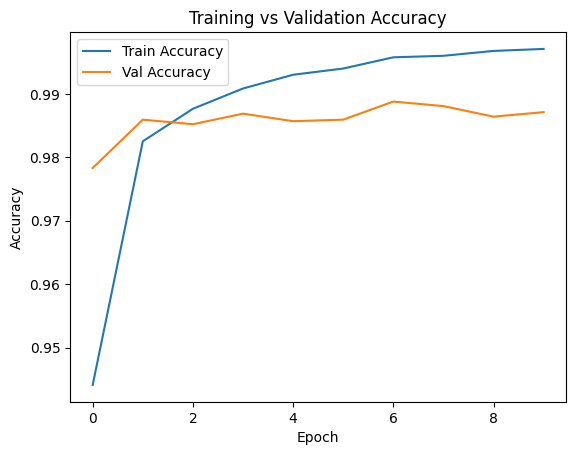

In [17]:
# Plot training and validation accuracy across epochs to visualize model performance
import matplotlib.pyplot as plt
plt.plot(train_history.history['accuracy'], label='Train Accuracy')
plt.plot(train_history.history['val_accuracy'], label='Val Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title("Training vs Validation Accuracy");

In [18]:
#model.save('Trained_CNN.keras', include_optimizer=False )

In [19]:
model.save("Trained_CNN.h5")